In [238]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [309]:
def getDf(path = '../resources/augmentation'):
  all_folder = os.listdir(path)
  df = pd.DataFrame(columns=['number_img', 'disease', 'disease_family', 'healthy', 'specie'], index=all_folder)

  for name_folder in all_folder:
    files = os.listdir(f"{path}/{name_folder}");
    name_splited = name_folder.split('___')
    df.loc[name_folder].specie = name_splited[0].lower()
    df.loc[name_folder].number_img = len(files)
    df.loc[name_folder].disease = name_splited[-1].lower()
    df.loc[name_folder].disease_family = df.loc[name_folder].disease.split('_')[-1].replace(')', '')
    df.loc[name_folder].healthy = name_splited[-1] == 'healthy'
  return df

In [329]:
df_augmentation = getDf()
df_no_augmentation = getDf('../resources/no_augmentation')
display(df_augmentation.head(5))
display(df_no_augmentation.head(5))

,number_img,disease,disease_family,healthy,specie
Strawberry___healthy,1000,healthy,healthy,True,strawberry
Grape___Black_rot,1180,black_rot,rot,False,grape
Potato___Early_blight,1000,early_blight,blight,False,potato
Blueberry___healthy,1502,healthy,healthy,True,blueberry
Cherry___Powdery_mildew,1052,powdery_mildew,mildew,False,cherry


,number_img,disease,disease_family,healthy,specie
Strawberry___healthy,456,healthy,healthy,True,strawberry
Grape___Black_rot,1180,black_rot,rot,False,grape
Potato___Early_blight,1000,early_blight,blight,False,potato
Blueberry___healthy,1502,healthy,healthy,True,blueberry
Cherry___Powdery_mildew,1052,powdery_mildew,mildew,False,cherry


# Species and number of images

Text(0.5, 1.0, 'with augmentation')

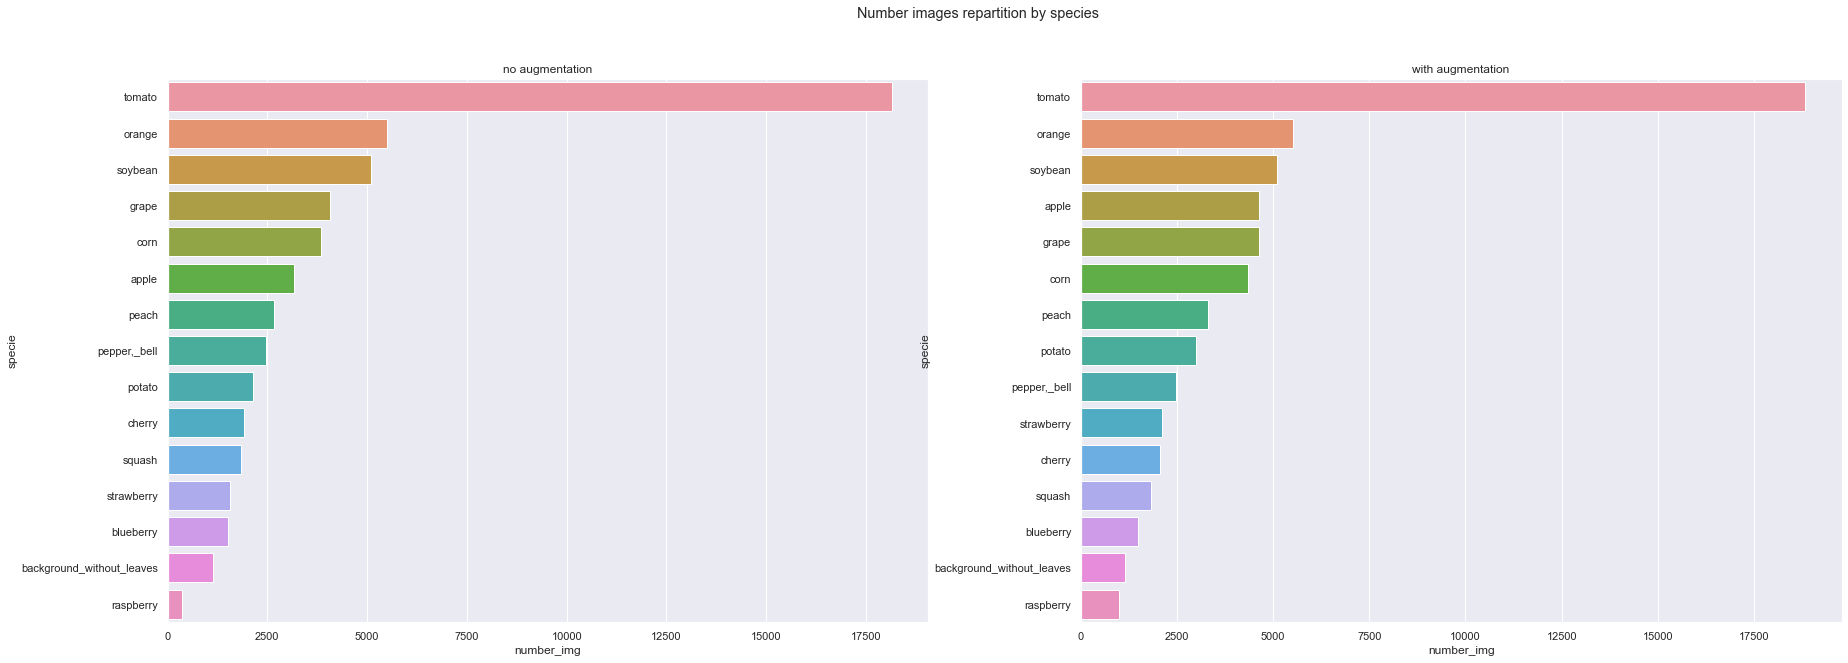

In [355]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Number images repartition by species')

df_no_augmentation_groupby_specie = df_no_augmentation.groupby(by='specie').sum()
df_no_augmentation_groupby_specie.reset_index(inplace=True)

df_augmentation_groupby_specie = df_augmentation.groupby(by='specie').sum()
df_augmentation_groupby_specie.reset_index(inplace=True)


sns.barplot(ax=axes[0], x="number_img", y="specie", data=df_no_augmentation_groupby_specie, order=df_no_augmentation_groupby_specie.sort_values('number_img', ascending=False).specie)
sns.barplot(ax=axes[1], x="number_img", y="specie", data=df_augmentation_groupby_specie, order=df_augmentation_groupby_specie.sort_values('number_img', ascending=False).specie)

axes[0].set_title('no augmentation')
axes[1].set_title('with augmentation')

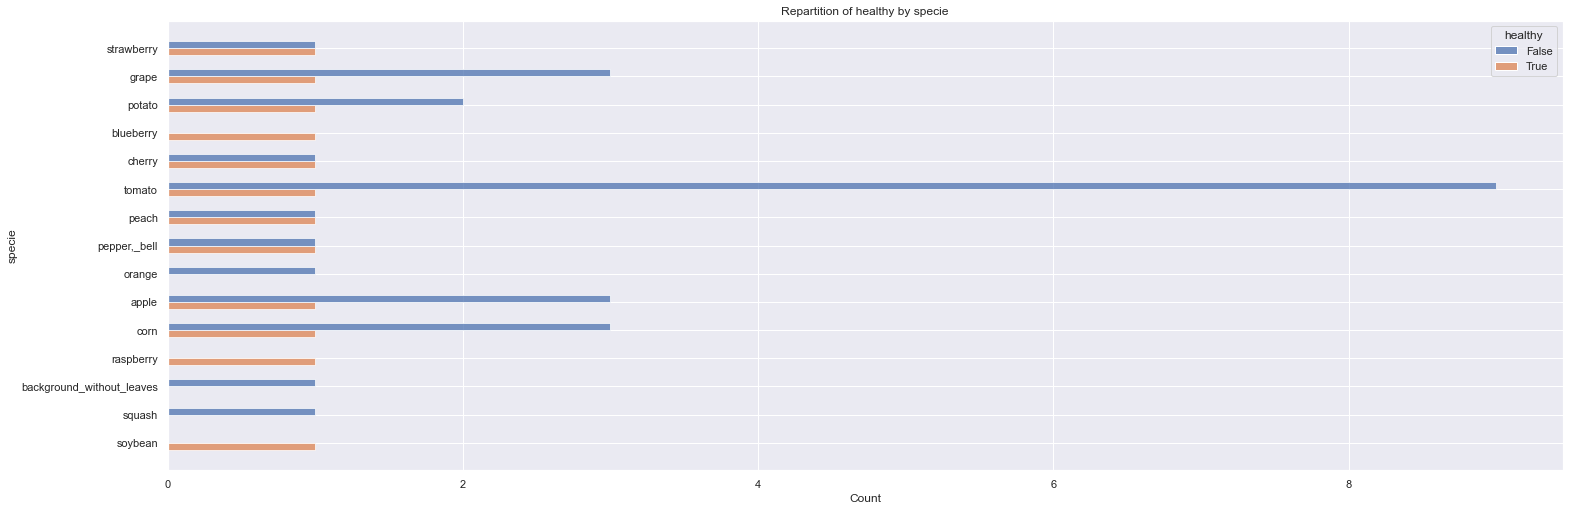

In [361]:
ax = sns.histplot(y="specie", hue="healthy", multiple="dodge", shrink=0.5, data=df_no_augmentation).set(title='Repartition of healthy by specie')

# Disease

Text(0.5, 1.0, 'with augmentation')

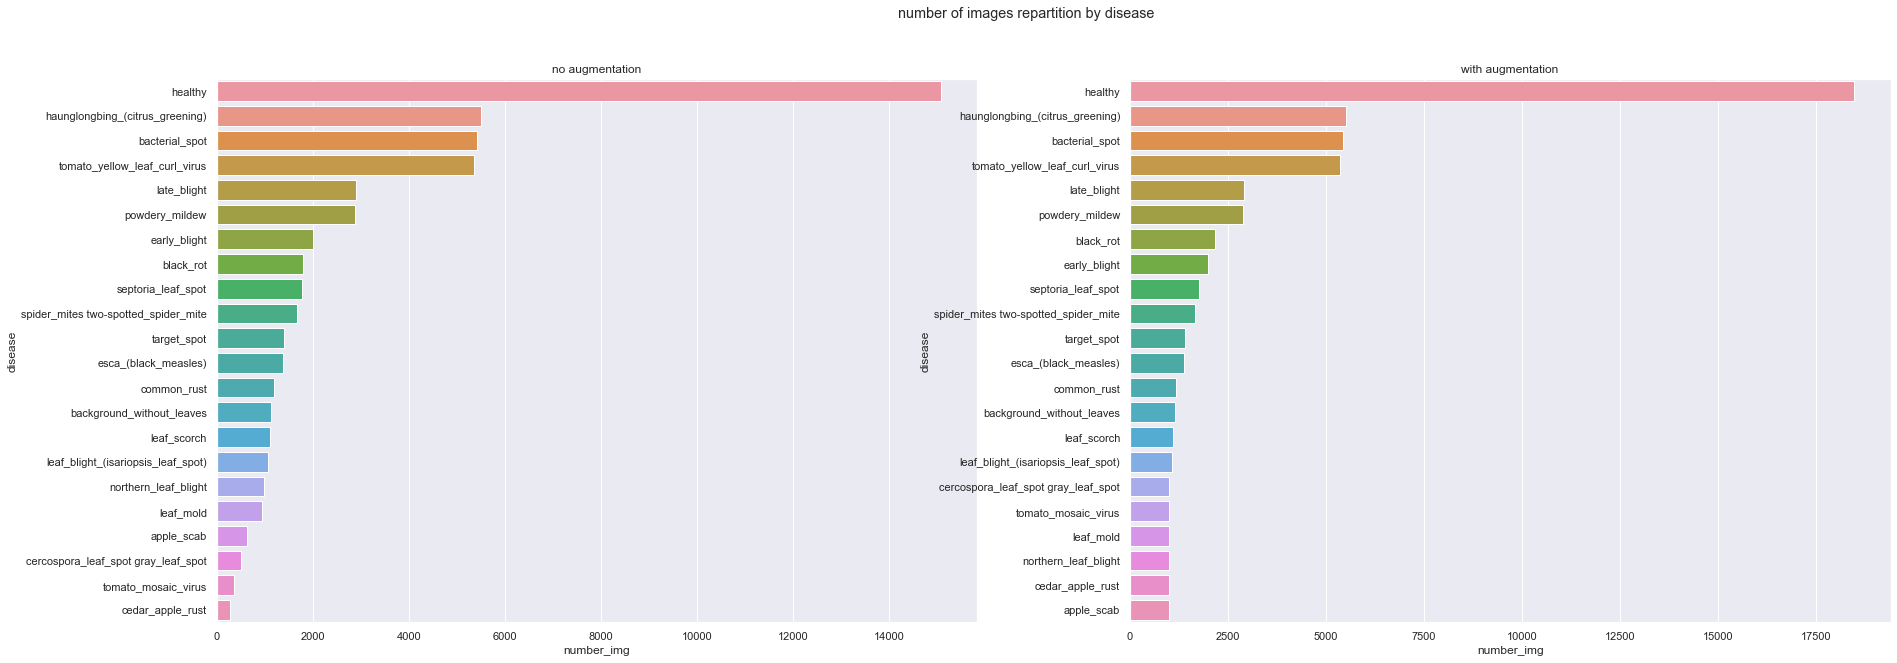

In [348]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('number of images repartition by disease')

df_no_augmentation_groupby_disease = df_no_augmentation.groupby(by='disease').sum()
df_no_augmentation_groupby_disease.reset_index(inplace=True)

df_augmentation_groupby_disease = df_augmentation.groupby(by='disease').sum()
df_augmentation_groupby_disease.reset_index(inplace=True)


sns.barplot(ax=axes[0], x="number_img", y="disease", data=df_no_augmentation_groupby_disease, order=df_no_augmentation_groupby_disease.sort_values('number_img', ascending=False).disease)
sns.barplot(ax=axes[1], x="number_img", y="disease", data=df_augmentation_groupby_disease, order=df_augmentation_groupby_disease.sort_values('number_img', ascending=False).disease)

axes[0].set_title('no augmentation')
axes[1].set_title('with augmentation')

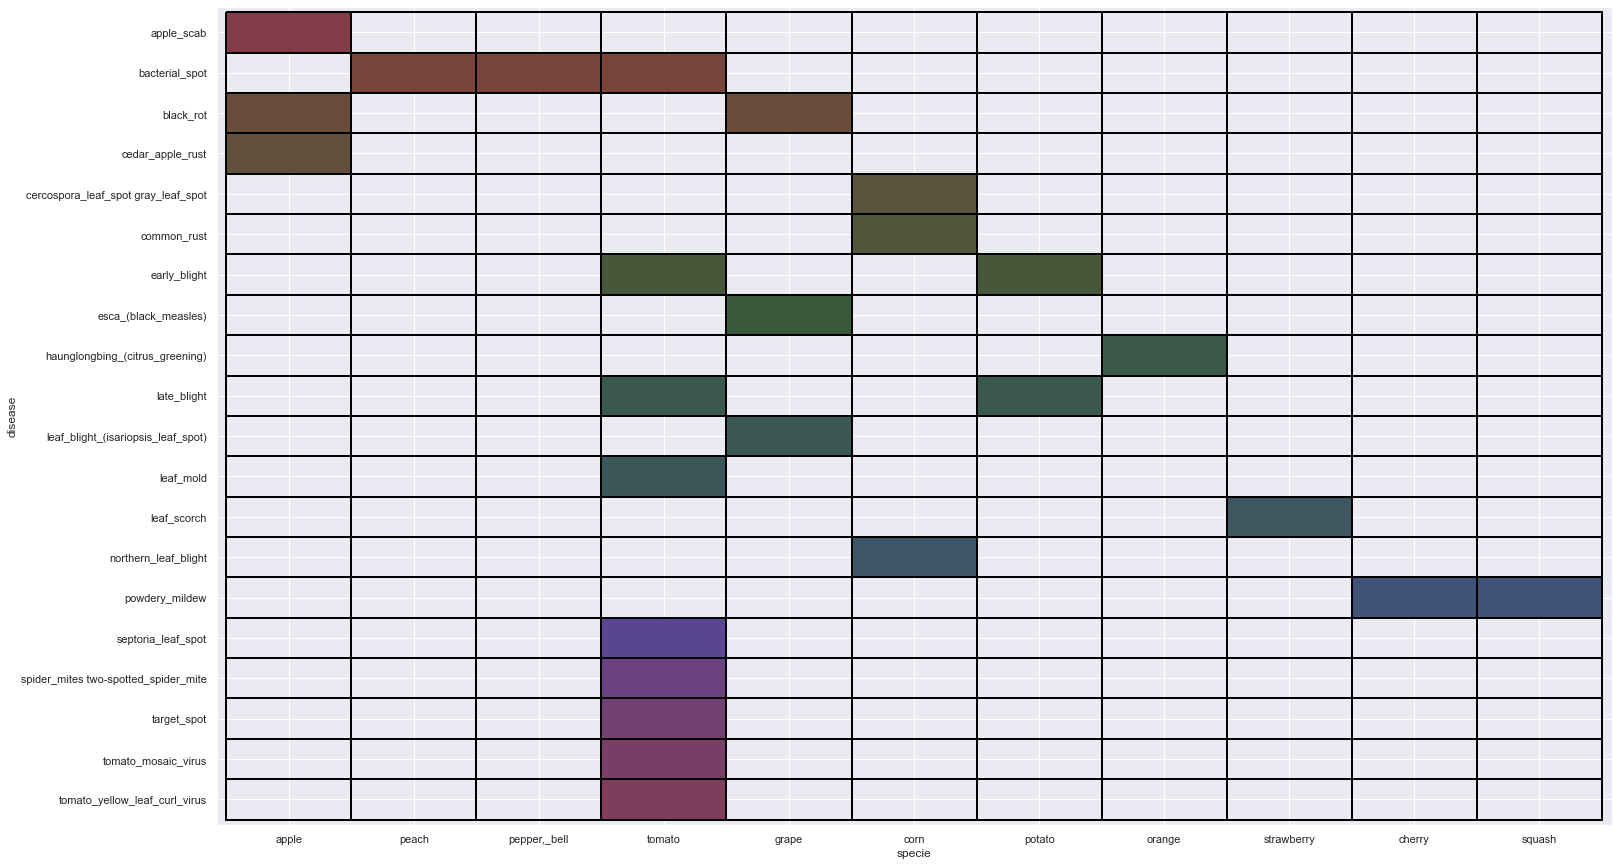

In [349]:
df_no_augmentation_groupby_disease = df_no_augmentation.groupby(by=['disease', 'specie']).sum()
df_no_augmentation_groupby_disease.reset_index(inplace=True)
df_no_augmentation_groupby_disease = df_no_augmentation_groupby_disease[~df_no_augmentation_groupby_disease['healthy']]
df_no_augmentation_groupby_disease = df_no_augmentation_groupby_disease[df_no_augmentation_groupby_disease['disease'] != 'background_without_leaves']

plt.subplots_adjust(top=1.5)
ax = sns.histplot(y="disease", x='specie', hue="disease", data=df_no_augmentation_groupby_disease, legend=False, edgecolor='black', linewidth=0.1)
ax.margins(x=0.007, y=0.007)

# Disease family

Text(0.5, 1.0, 'with augmentation')

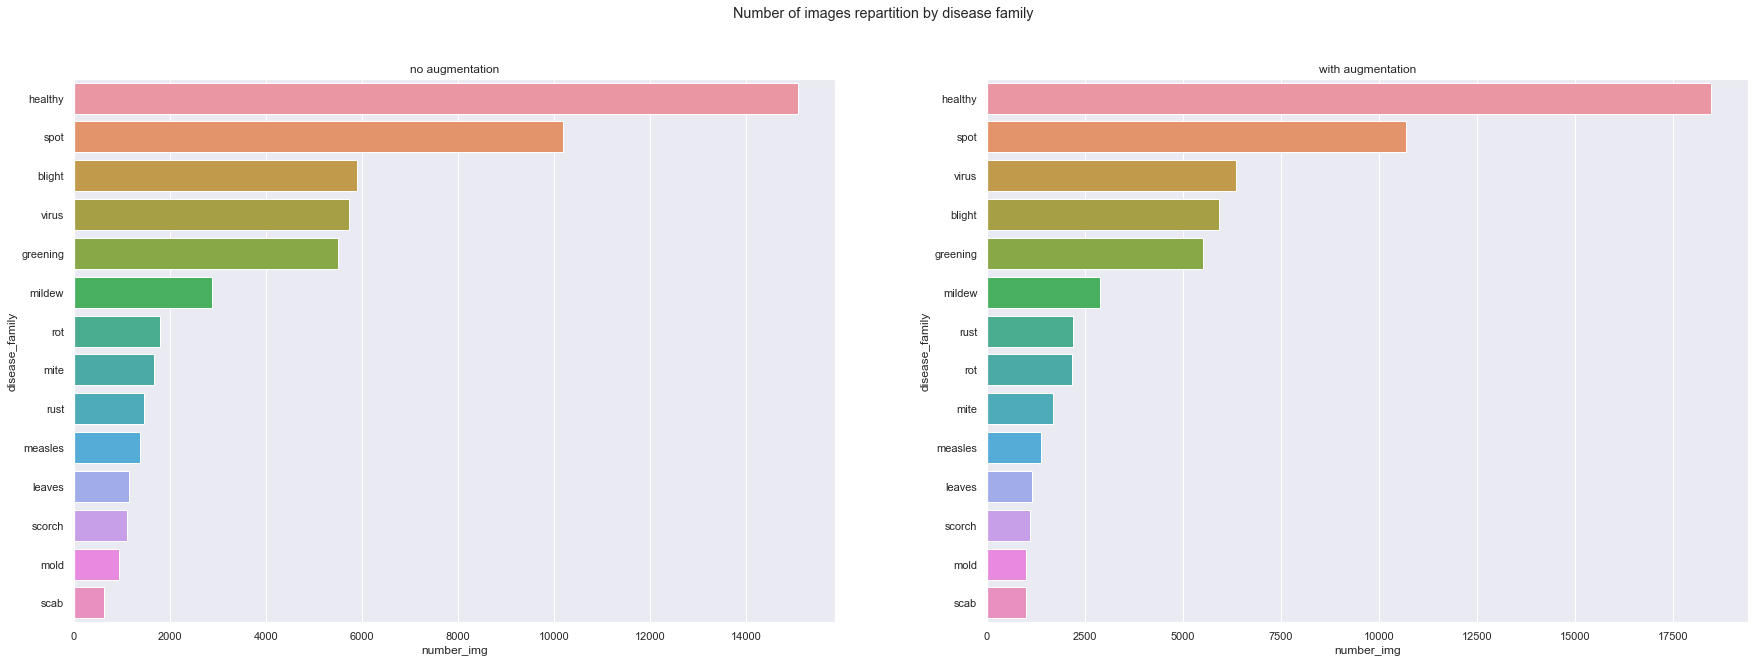

In [347]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Number of images repartition by disease family')

df_no_augmentation_groupby_disease = df_no_augmentation.groupby(by='disease_family').sum()
df_no_augmentation_groupby_disease.reset_index(inplace=True)

df_augmentation_groupby_disease = df_augmentation.groupby(by='disease_family').sum()
df_augmentation_groupby_disease.reset_index(inplace=True)


sns.barplot(ax=axes[0], x="number_img", y="disease_family", data=df_no_augmentation_groupby_disease, order=df_no_augmentation_groupby_disease.sort_values('number_img', ascending=False).disease_family)
sns.barplot(ax=axes[1], x="number_img", y="disease_family", data=df_augmentation_groupby_disease, order=df_augmentation_groupby_disease.sort_values('number_img', ascending=False).disease_family)

axes[0].set_title('no augmentation')
axes[1].set_title('with augmentation')

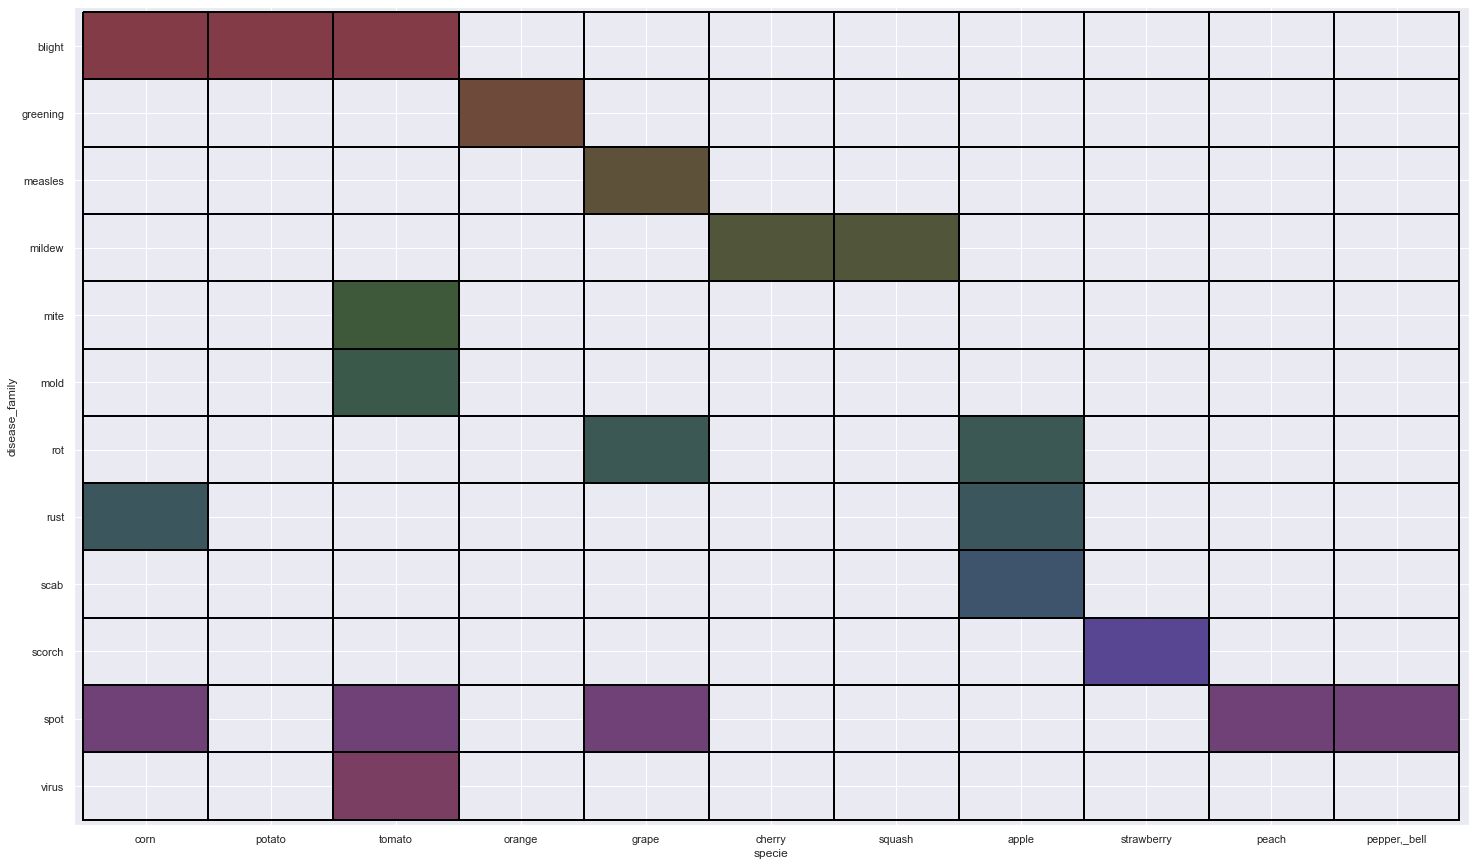

In [345]:
df_no_augmentation_groupby_disease_fam = df_no_augmentation.groupby(by=['disease_family', 'specie']).sum()
df_no_augmentation_groupby_disease_fam.reset_index(inplace=True)
df_no_augmentation_groupby_disease_fam.healthy = df_no_augmentation_groupby_disease_fam.healthy.astype(bool)
df_no_augmentation_groupby_disease_fam = df_no_augmentation_groupby_disease_fam[~df_no_augmentation_groupby_disease_fam['healthy']]
df_no_augmentation_groupby_disease_fam = df_no_augmentation_groupby_disease_fam[df_no_augmentation_groupby_disease_fam['disease'] != 'background_without_leaves']

plt.subplots_adjust(top=1.5)
ax = sns.histplot(y="disease_family", x='specie', hue="disease_family", data=df_no_augmentation_groupby_disease_fam, legend=False, edgecolor='black', linewidth=0.1)
ax.margins(x=0.007, y=0.007)